<a href="https://colab.research.google.com/github/AlexaZebra/Coursework/blob/main/EDA_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn-darkgrid')
import seaborn as sns 

# Загрузка данных

In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [3]:
netflix_overall = pd.read_csv('netflix_titles.csv')
netflix_overall

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


Проверка датасета на пропуски

In [95]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Пропуски есть и больше всего в столбце режиссер (director), но в целом не так много

Разбиваем данные на сериалы и фильмы, чтобы вести дальнейшую аналитику по отдельности

In [96]:
netflix_shows = netflix_overall[netflix_overall['type'] == 'TV Show'].copy()

In [97]:
netflix_movies = netflix_overall[netflix_overall['type'] == 'Movie'].copy()

Text(0, 0.5, 'Distribution')

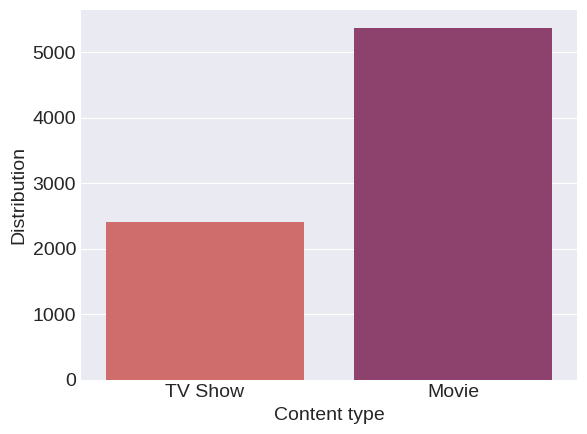

In [98]:
ax = sns.countplot(x = 'type', data = netflix_overall, palette = 'flare')
plt.xlabel('Content type')
plt.ylabel('Distribution')

В исходных данных получается, что фильмов на Netflix в два раза больше, чем сериалов

# Популярное время длительности

Сколько длятся по времени фильмы и сериалы на Нетфлексе

In [99]:
topdirs = pd.value_counts(netflix_overall['duration'])
topdirs

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
233 min         1
196 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

In [100]:
from plotly import graph_objects as go
fig = go.Figure([
    go.Bar(x = topdirs.index, y = topdirs.values, text = topdirs.values, marker_color = 'indigo')
])
fig.update_traces(texttemplate = '%{text:.2s}', textposition = 'outside')

Самая популярная длительность сериалов это 1-3 сезона, у фильмов около часа

# Какое время самое привлекательное для релиза контента?

Месяц с наименьшим количеством контента
есть периоды, когда месяцами не выходят популярные произведения, но зрители хотят смотреть всегда, поэтому это отличный шанс, чтобы выпустить в это время свою картину 

Проверим, есть ли пропуски в дате публикации на платформу

In [101]:
netflix_overall.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Их всего лишь 10 штук, поэтому их можно удалить

In [102]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date.isna().sum()

date_added    0
dtype: int64

Теперь возьмем только признак дату и из нее возьмем только месяц и год

In [103]:
netflix_date.head()

,date_added
0,"August 14, 2020"
5,"July 1, 2017"
11,"November 30, 2018"
12,"May 17, 2019"
16,"March 20, 2019"


In [104]:
from datetime import datetime
from dateutil.parser import parse

netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
netflix_date['day'] = netflix_date['date_added'].apply(lambda x : x.split()[1].rstrip(','))
netflix_date['weekday'] = netflix_date['date_added'].apply(lambda x: parse(str(x)).strftime("%A"))
netflix_date.head()

,date_added,year,month,day,weekday
0,"August 14, 2020",2020,August,14,Friday
5,"July 1, 2017",2017,July,1,Saturday
11,"November 30, 2018",2018,November,30,Friday
12,"May 17, 2019",2019,May,17,Friday
16,"March 20, 2019",2019,March,20,Wednesday


Теперь отсортируем от самого раннего добавления фильма к самому последнему

In [105]:
netflix_date.sort_values(by = ['year', 'month'])

,date_added,year,month,day,weekday
1765,"February 4, 2008",2008,February,4,Monday
1089,"August 2, 2013",2013,August,2,Friday
3098,"March 31, 2013",2013,March,31,Sunday
2503,"October 8, 2013",2013,October,8,Tuesday
5312,"October 14, 2013",2013,October,14,Monday
...,...,...,...,...,...
6203,"January 1, 2021",2021,January,1,Friday
6438,"January 1, 2021",2021,January,1,Friday
6477,"January 8, 2021",2021,January,8,Friday
6634,"January 15, 2021",2021,January,15,Friday


Видим, что основная часть публикаций начинается с 2013 года 

Список, отсортированный по месяцам в каждом году

In [106]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,39.0,64.0,50.0,74.0,0.0
November,0.0,0.0,3.0,2.0,18.0,31.0,41.0,77.0,55.0,0.0
October,0.0,2.0,0.0,5.0,18.0,32.0,46.0,73.0,56.0,0.0
September,0.0,1.0,0.0,1.0,19.0,33.0,44.0,44.0,62.0,0.0
August,0.0,1.0,0.0,0.0,17.0,38.0,34.0,53.0,61.0,0.0
July,0.0,0.0,0.0,3.0,10.0,34.0,30.0,67.0,53.0,0.0
June,0.0,0.0,0.0,3.0,8.0,30.0,28.0,48.0,48.0,0.0
May,0.0,0.0,0.0,2.0,4.0,25.0,28.0,49.0,64.0,0.0
April,0.0,0.0,1.0,4.0,8.0,29.0,31.0,50.0,58.0,0.0


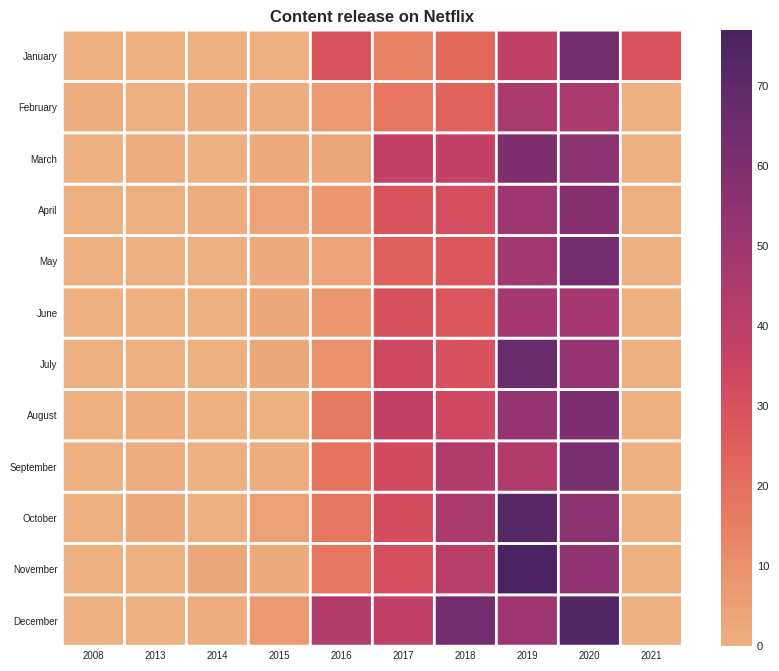

In [107]:
plt.figure( figsize=(10,8))
plt.pcolor(df, cmap = 'flare', edgecolors = 'white', linewidths = 2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize = 7)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize = 7)

plt.title('Сontent release on Netflix', fontsize = 12, fontweight = 'bold')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize = 8)
plt.show()

декабрь и январь достаточно прибыльные месяцы из-за праздников, однако в 2019 году в эти месяцы выпустилось довольно мало контента

In [108]:
df1 = pd.concat([netflix_overall['title'], netflix_date['day'], netflix_date['weekday']], axis=1).dropna()
df1

,title,day,weekday
0,3%,14,Friday
5,46,1,Saturday
11,1983,30,Friday
12,1994,17,Friday
16,Feb-09,20,Wednesday
...,...,...,...
7767,Zindagi Gulzar Hai,15,Thursday
7775,Zoids Wild,14,Friday
7777,Zombie Dumb,1,Monday
7779,Zona Rosa,26,Tuesday


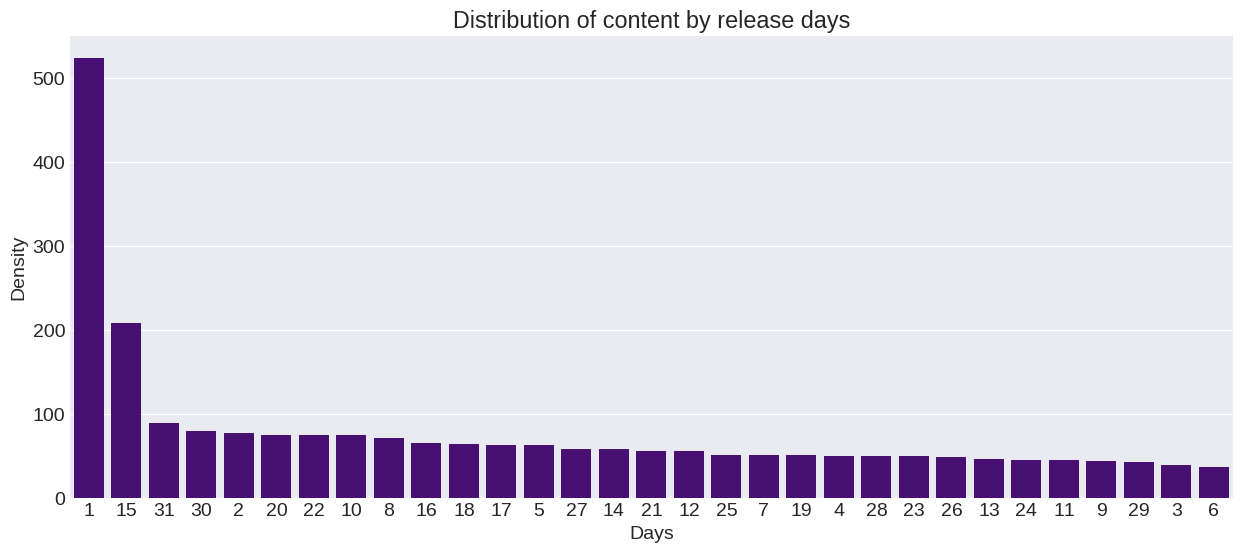

In [109]:
order = df1['day'].value_counts().index

plt.figure(figsize=(15,6))
sns.countplot(x='day', data=df1, color = 'indigo', order = order)
plt.title ('Distribution of content by release days')
plt.xlabel('Days')
plt.ylabel('Density')
plt.show()

первого числа каждого месяца добавлялось больше всего контента.

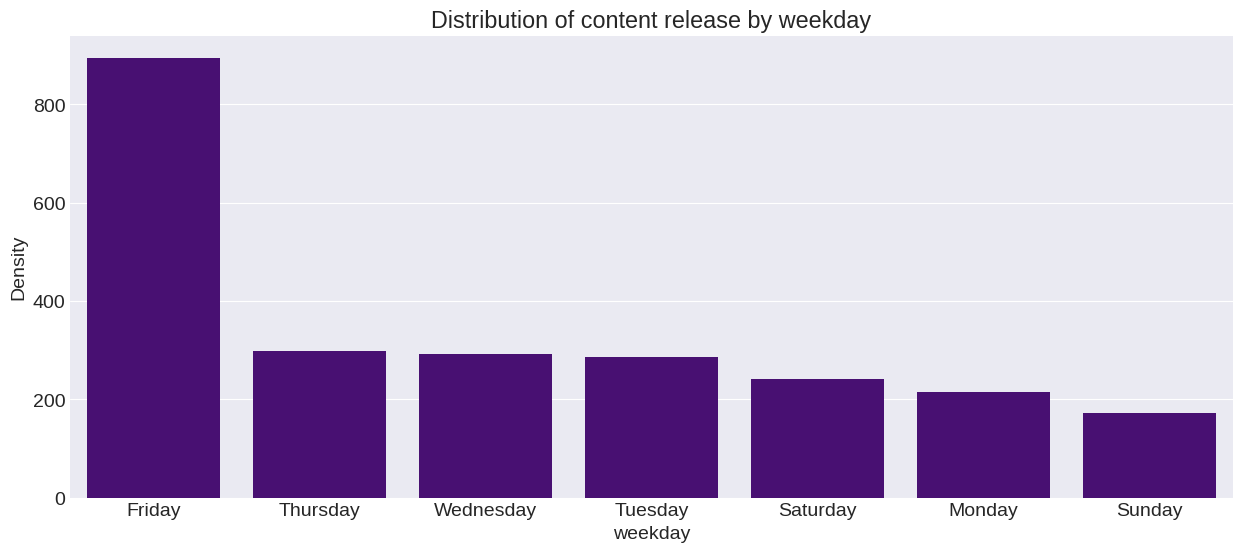

In [110]:
order = df1['weekday'].value_counts().index

plt.figure(figsize=(15,6))
sns.countplot(x='weekday', data=df1, color = 'indigo', order = order)
plt.title ('Distribution of content release by weekday')
plt.ylabel('Density')
plt.show()

Больше всего контента выпускается в пятницу

# Анализ фильмов

## Анализ возрастного рейтинга фильмов

Возьмем топ 20 фильмов

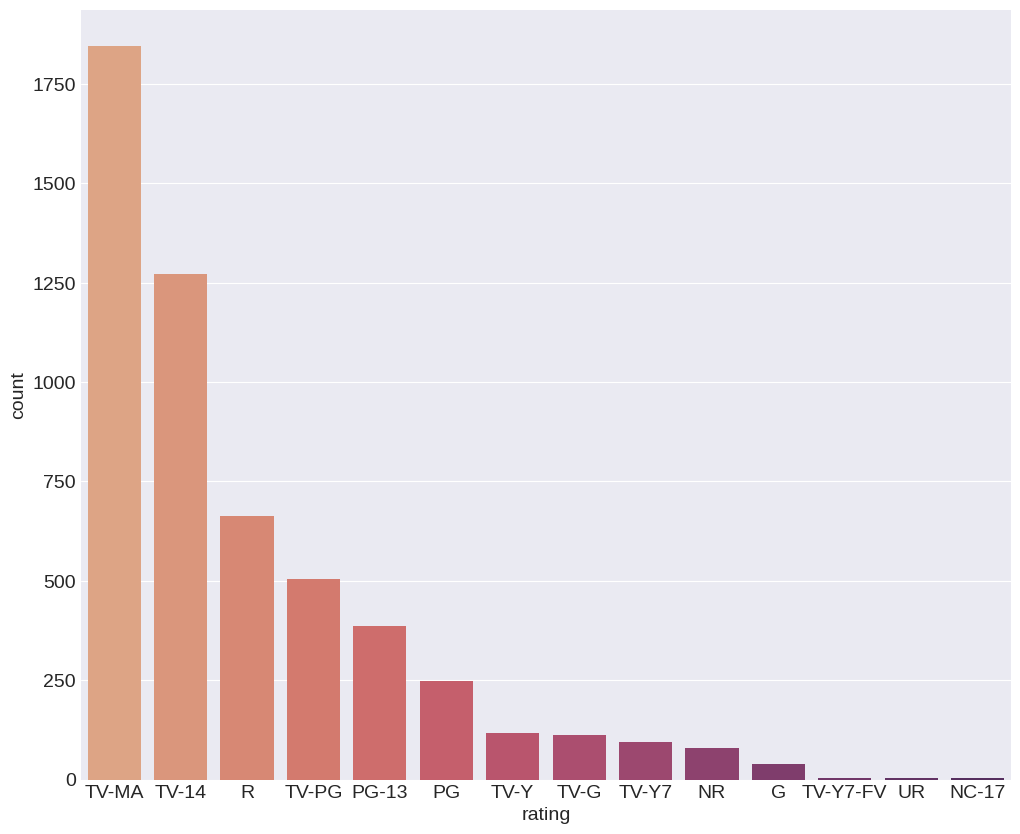

In [111]:
# выбираем нужный стобец в датасете фильмов и выводим количество фильмов в каждом рейтинге из топ-20 
plt.figure(figsize = (12,10))
ax = sns.countplot(x = 'rating', data = netflix_movies, palette = 'flare', order = netflix_movies['rating'].value_counts().index[0:20])

TV-MA - это фильмы для взрослой аудитории и эта группа самая большая.
TV-14 - это фильмы для 14+ лет, вторая по величине группа.
R - это фильмы для 17+ лет, третья по величине группа фильмов.

## Анализ года выпуска фильмов

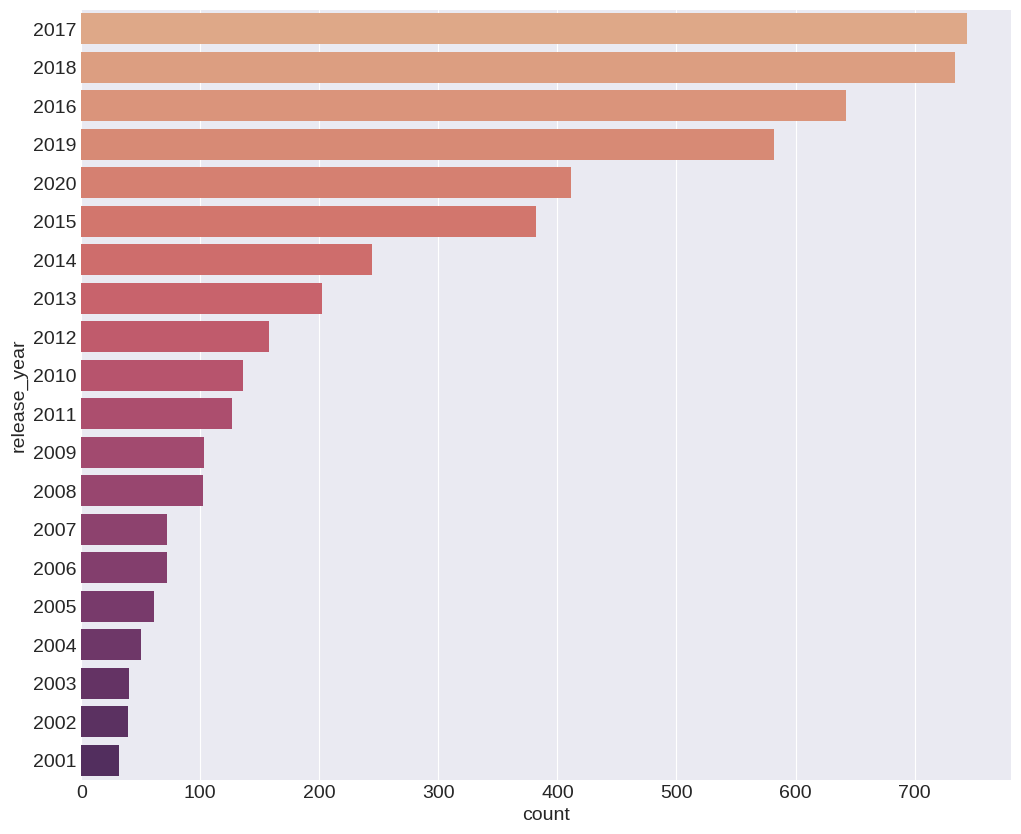

In [112]:
# выбираем нужный стобец в датасете фильмов и выводим количество фильмов каждого года из топ-20 
plt.figure(figsize = (12,10))
ax = sns.countplot(y = 'release_year', data = netflix_movies, palette = 'flare', order = netflix_movies['release_year'].value_counts().index[0:20])

В 2017 году вышло больше всего фильмов

## Топ 10 стран, которые выпускают фильмы

Проверим есть ли пропуски в признаке страна (country)

In [113]:
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        163
cast            426
country         230
date_added        0
release_year      0
rating            5
duration          0
listed_in         0
description       0
dtype: int64

Пропуски есть и их достаточно много, поэтому заменим их на категорию unknown, вместо того, чтобы просто выкинуть

In [114]:
netflix_movies['country'].fillna('Unknown', inplace = True)

Теперь посмотрим на сами значения в country

In [115]:
netflix_movies['country'].value_counts()

United States                                                   1850
India                                                            852
Unknown                                                          230
United Kingdom                                                   193
Canada                                                           118
                                                                ... 
United Kingdom, Denmark, Canada, Croatia                           1
United States, South Korea                                         1
Kenya, United States                                               1
India, Turkey                                                      1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 591, dtype: int64

Видно, что над некоторыми фильмами работали несколько стран сразу, но сделаем так, чтобы такие фильмы включались в подсчет каждой стране, которая учавствовала в его создании 

In [116]:
countries_movies = {}                             # словарь стран
count_ = list(netflix_movies['country'])          # подсчитываем количество стран и групп стран
for i in count_:                                  # цикл по ним
    i = i.replace(' ', '')                        # удалаяем пробелы, чтобы названия стран шли слитно
    i = list(i.split(','))                        # и разбиваем их через запятую

    for j in i:                                   # проходимся по списку стран в группе
        if j in list(countries_movies.keys()):    # и если данная страна есть в словаре стран,
          countries_movies[j] += 1                # то прибавляем его в счетчик фильмов
        else:                                     # иначе, если такой страны еще нет в словаре
          countries_movies[j] = 1                 # инициализируем счетчик фильмов с значением 1 для новой страны

Сделаем сортировку по убыванию от стран с самым большим количеством фильмов 

In [117]:
# передаем в функцию sorted объекты из словаря и сортируем по ключу количество фильмов
countries_sort = sorted(countries_movies.items(), key = lambda item : countries_movies[item[0]], reverse = True)

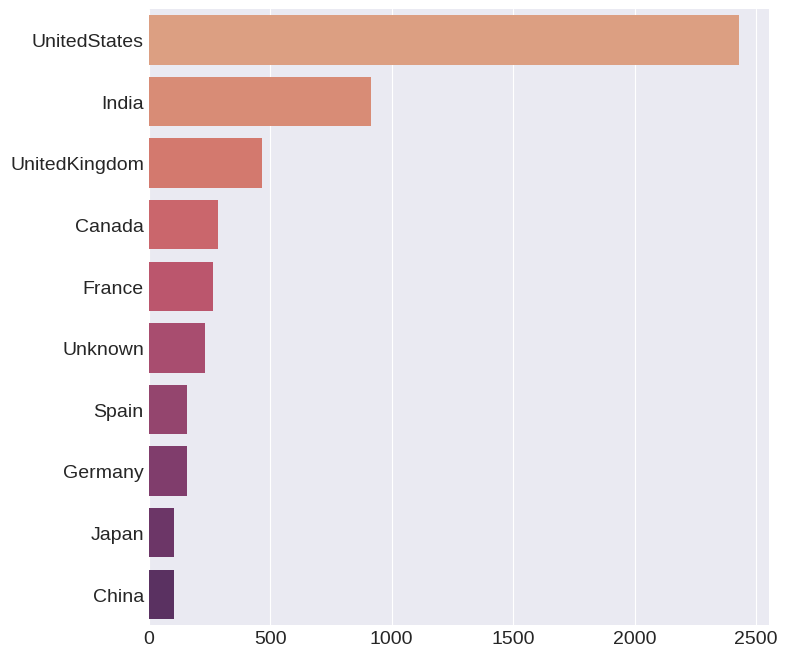

In [118]:
countries_sort = countries_sort[:10]
names = [name for name, value in countries_sort]
values = [value for name, value in countries_sort]

plt.figure(figsize = (8,8))
ax = sns.barplot(x = values, y = names, palette = 'flare')
plt.show()

На первом месте Hollywood, на втором Bollywood и какая-то крупная студия в Великобритании

## Анализ продолжительности фильмов

Чтобы визуализировать продолжительность нужно убрать слово min в столбце duration и поменять тип данных на integer

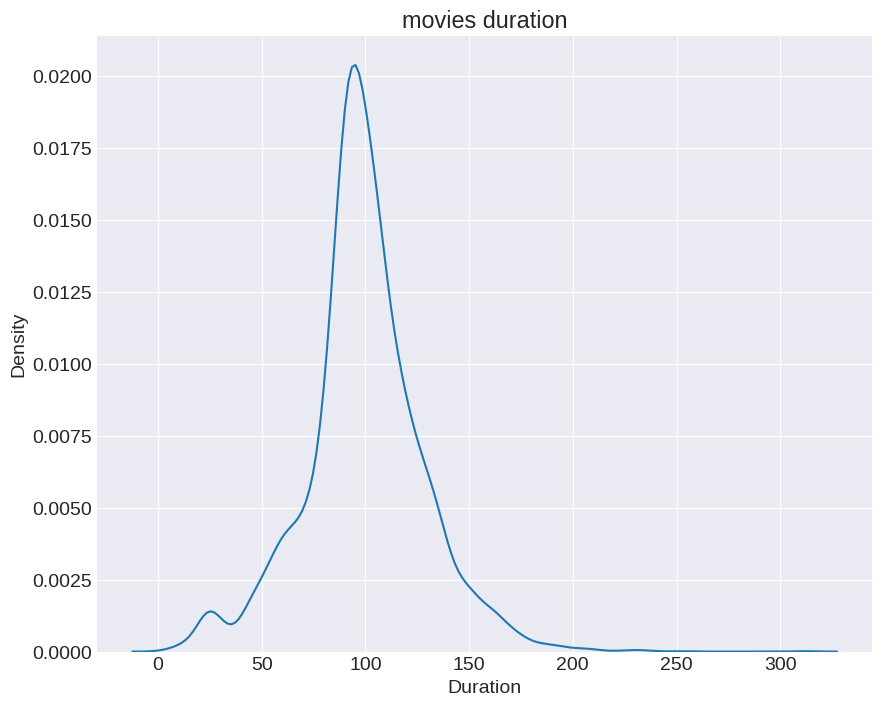

In [119]:
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration'] = netflix_movies['duration'].astype(int)
plt.figure(figsize = (10,8))
sns.kdeplot(data = netflix_movies['duration'])
plt.title ('movies duration')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()

In [120]:
netflix_movies['duration'].mean() # среднее значение продолжительности

99.30797842663195

Как видно из графика средняя продолжительность фильмов 80-120 минут и есть маленький бугорок в значении 25 минут "короткометражки"

## Анализ жанров

In [121]:
netflix_movies['listed_in']

1                            Dramas, International Movies
2                     Horror Movies, International Movies
3       Action & Adventure, Independent Movies, Sci-Fi...
4                                                  Dramas
6                     Horror Movies, International Movies
                              ...                        
7781                   Children & Family Movies, Comedies
7782                         Dramas, International Movies
7783       Dramas, International Movies, Music & Musicals
7784    Documentaries, International Movies, Music & M...
7786                      Documentaries, Music & Musicals
Name: listed_in, Length: 5377, dtype: object

Т.к. у нас жанры в группах, разобьем их по одному

In [122]:
from collections import Counter

geners = list(netflix_movies['listed_in'])
gen = []

for i in geners:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))

g = Counter(gen)

In [123]:
geners_sort = sorted(g.items(), key = lambda item : g[item[0]], reverse = True)

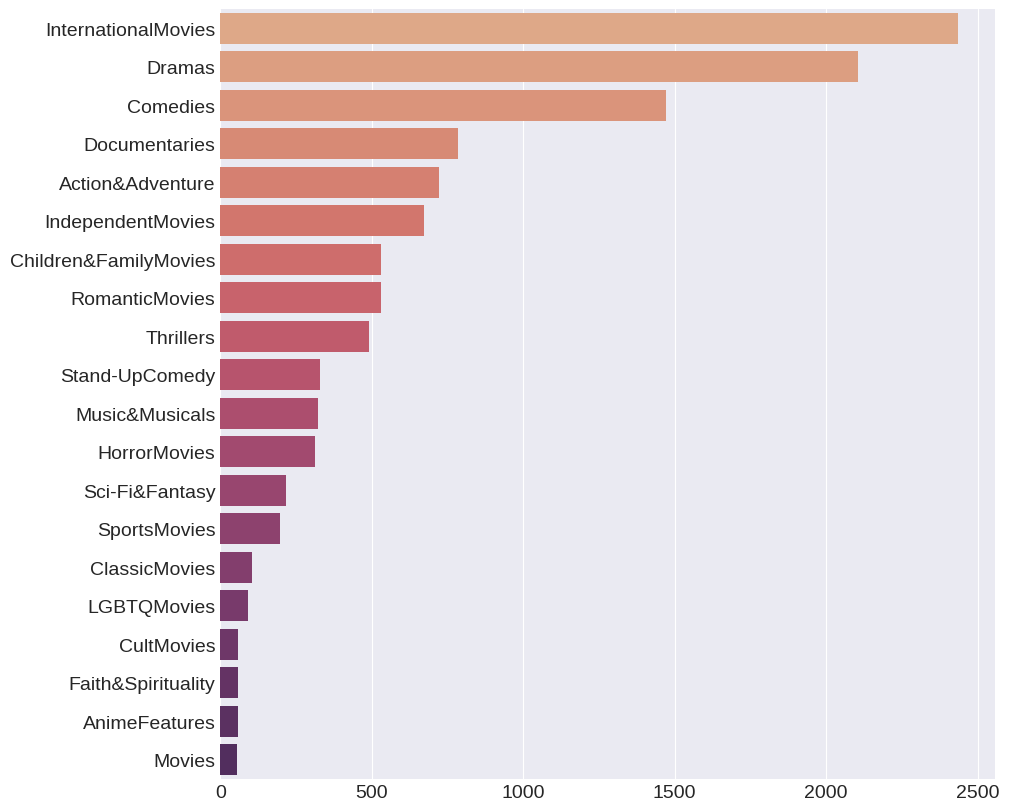

In [124]:
names = [name for name, value in geners_sort]
values = [value for name, value in geners_sort]

plt.figure(figsize = (10,10))
ax = sns.barplot(x = values, y = names, palette = 'flare')
plt.show()

Топовые жанры - это мировое кино, драмы, комедии

## Топ 10 популярных актеров в фильмах

In [125]:
netflix_movies['cast'].fillna('Unknown', inplace = True)

In [126]:
actors_movies = {}                                # словарь актеров
count_ = list(netflix_movies['cast'])             # подсчитываем количество актеров и групп актеров
for i in count_:                                  # цикл по ним
    i = i.replace(' ', '')                        # удалаяем пробелы, чтобы названия актеров шли слитно
    i = list(i.split(','))                        # и разбиваем их через запятую

    for j in i:                                   # проходимся по списку актеров в группе
        if j in list(actors_movies.keys()):       # и если данный актер есть в словаре актеров,
          actors_movies[j] += 1                   # то прибавляем его в счетчик фильмов
        else:                                     # иначе, если такого актера еще нет в словаре
          actors_movies[j] = 1                    # инициализируем счетчик фильмов с значением 1 для нового актера

In [127]:
actors_sort = sorted(actors_movies.items(), key = lambda item : actors_movies[item[0]], reverse = True)

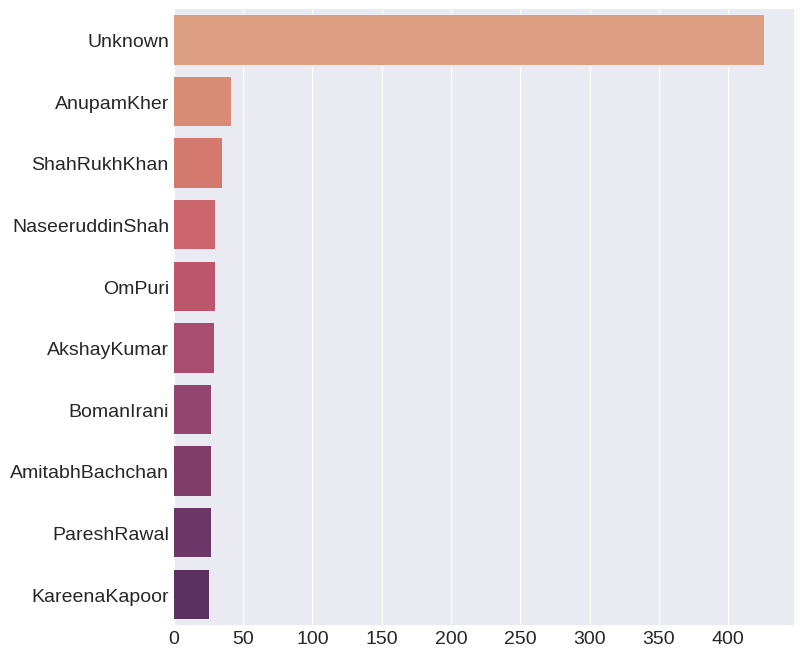

In [128]:
actors_sort = actors_sort[:10]
names = [name for name, value in actors_sort]
values = [value for name, value in actors_sort]

plt.figure(figsize = (8,8))
ax = sns.barplot(x = values, y = names, palette = 'flare')
plt.show()

Anupam Kher, Shah Rukh Khan, Naseeruddin Shah одни из самых популярных актеров, снимавшихся в фильмах 

## Топ 10 популярных режиссеров фильмов

In [129]:
netflix_movies['director'].fillna('Unknown', inplace = True)

In [130]:
directors_movies = {}                               
count_ = list(netflix_movies['director'])             
for i in count_:                                 
    i = i.replace(' ', '')                       
    i = list(i.split(','))                       

    for j in i:                                   
        if j in list(directors_movies.keys()):       
          directors_movies[j] += 1                   
        else:                                     
          directors_movies[j] = 1                   

In [131]:
directors_sort = sorted(directors_movies.items(), key = lambda item : directors_movies[item[0]], reverse = True)

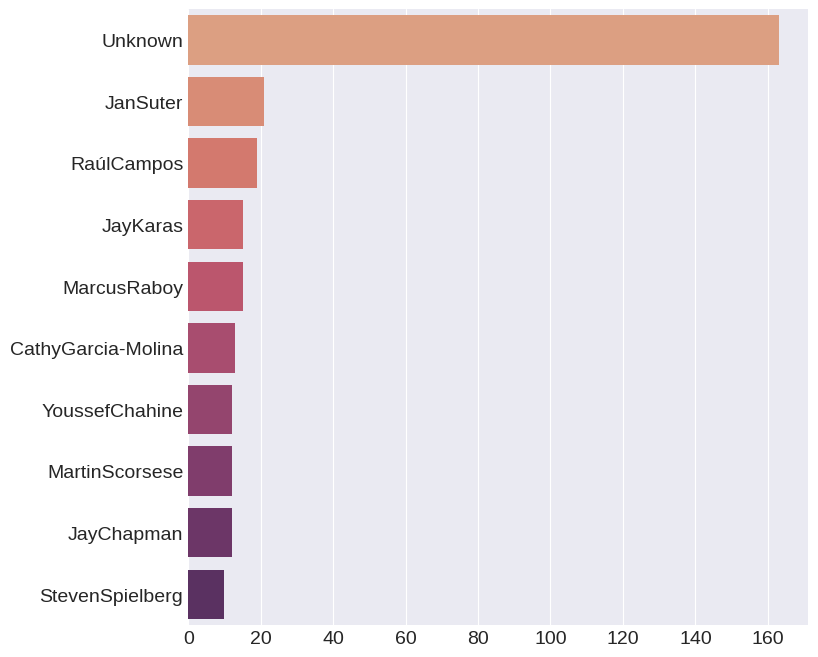

In [132]:
directors_sort = directors_sort[:10]
names = [name for name, value in directors_sort]
values = [value for name, value in directors_sort]

plt.figure(figsize = (8,8))
ax = sns.barplot(x = values, y = names, palette = 'flare')
plt.show()

Jan Suter, Raul Campos, Jay Karas самые популярные фильмоделы

# Анализ сериалов

## Анализ стран, выпускающих сериалы

Проверим пропуски и заполним их

In [133]:
netflix_shows.isna().sum()

show_id            0
type               0
title              0
director        2226
cast             292
country          277
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [134]:
netflix_shows['country'].fillna('Unknown', inplace = True)

In [135]:
netflix_movies['country'].value_counts()

United States                                                   1850
India                                                            852
Unknown                                                          230
United Kingdom                                                   193
Canada                                                           118
                                                                ... 
United Kingdom, Denmark, Canada, Croatia                           1
United States, South Korea                                         1
Kenya, United States                                               1
India, Turkey                                                      1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 591, dtype: int64

Множество стран разбиваем на отдельные

In [136]:
countries_shows = {}                              # словарь стран
count_2 = list(netflix_shows['country'])          # подсчитываем количество стран и групп стран
for i in count_2:                                 # цикл по ним
    i = i.replace(' ', '')                        # удалаяем пробелы, чтобы названия стран шли слитно
    i = list(i.split(','))                        # и разбиваем их через запятую

    for j in i:                                   # проходимся по списку стран в группе
        if j in list(countries_shows.keys()):     # и если данная страна есть в словаре стран,
          countries_shows[j] += 1                 # то прибавляем его в счетчик сериалов
        else:                                     # иначе, если такой страны еще нет в словаре
          countries_shows[j] = 1                  # инициализируем счетчик сериалов с значением 1 для новой страны

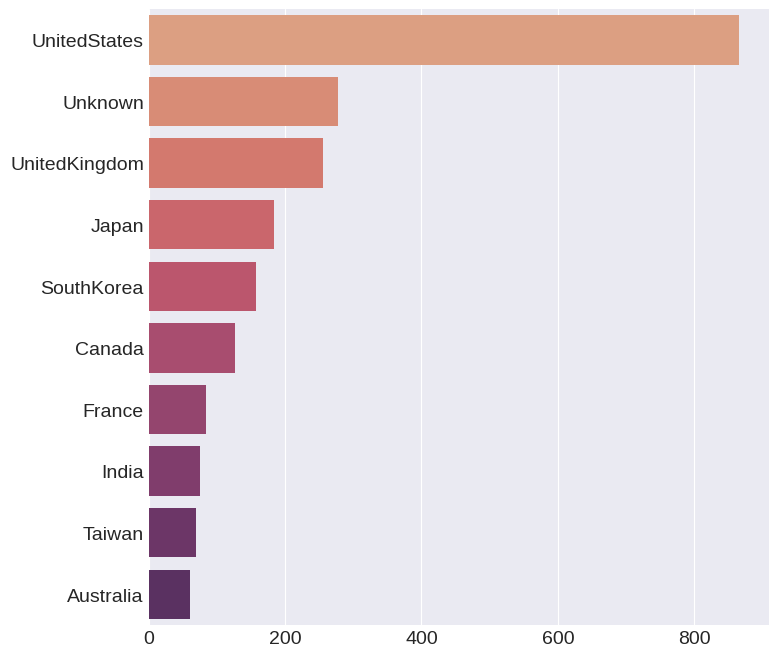

In [137]:
countries_sort_ = sorted(countries_shows.items(), key = lambda item : countries_shows[item[0]], reverse = True)

countries_sort_ = countries_sort_[:10]
names_ = [name for name, value in countries_sort_]
values_ = [value for name, value in countries_sort_]

plt.figure(figsize = (8,8))
ax = sns.barplot(x = values_, y = names_, palette = 'flare')
plt.show()

По сериалам топ-3 (исключая неизвестных производителей) это:
1. США
2. Великобритания
3. Япония

## Сериалы с большим количеством сезонов

In [138]:
features = ['title', 'duration']
durations = netflix_shows[features]
durations

,title,duration
0,3%,4 Seasons
5,46,1 Season
11,1983,1 Season
12,1994,1 Season
16,Feb-09,1 Season
...,...,...
7767,Zindagi Gulzar Hai,1 Season
7775,Zoids Wild,1 Season
7777,Zombie Dumb,2 Seasons
7779,Zona Rosa,1 Season


Уберем слова из durations 

In [ ]:
durations['season_'] = durations['duration'].str.replace(' Season', '')
durations['season_'] = durations['season_'].str.replace('s', '')
durations['season_'] = durations['season_'].astype(int)

In [140]:
durations

,title,duration,season_
0,3%,4 Seasons,4
5,46,1 Season,1
11,1983,1 Season,1
12,1994,1 Season,1
16,Feb-09,1 Season,1
...,...,...,...
7767,Zindagi Gulzar Hai,1 Season,1
7775,Zoids Wild,1 Season,1
7777,Zombie Dumb,2 Seasons,2
7779,Zona Rosa,1 Season,1


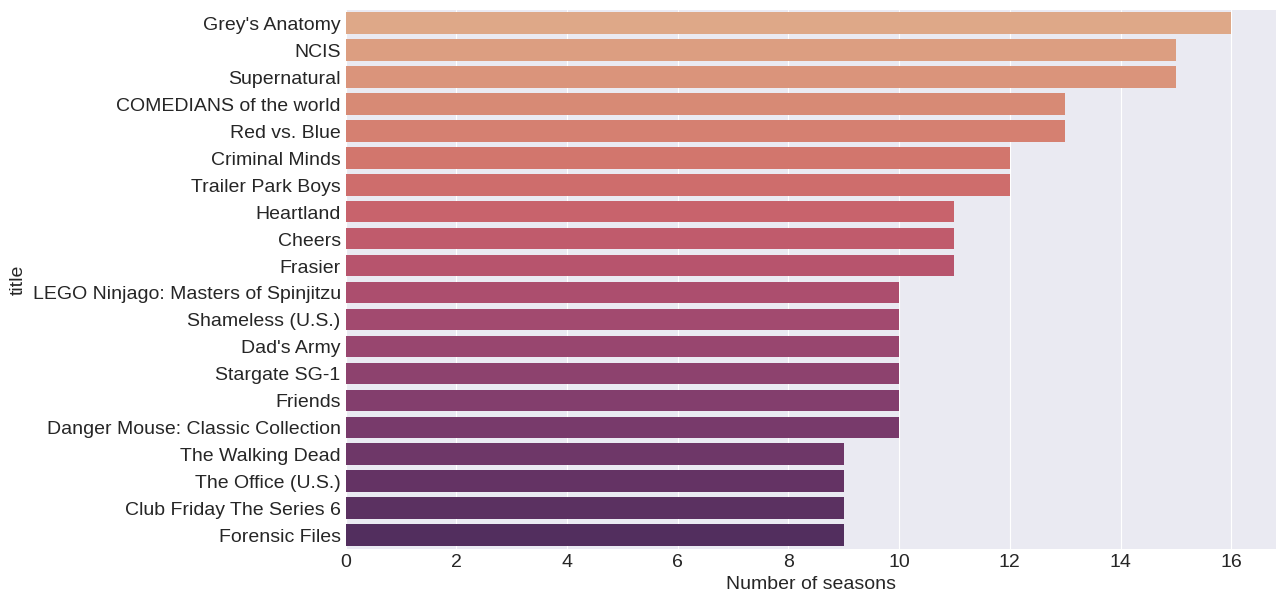

In [141]:
top = durations[['title', 'season_']]
top = top.sort_values(by = 'season_', ascending = False)
top_20 = top[:20]
plt.figure(figsize = (12,7))
ax = sns.barplot(x = top_20['season_'], y = top_20['title'], palette = 'flare')
plt.xlabel('Number of seasons')
plt.show()

Самое большое количество сезонов 16

## Анализ продолжительности сериала

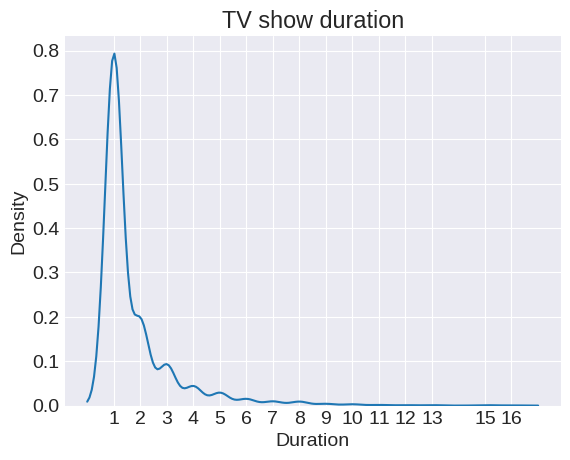

In [142]:
plt.Figure(figsize = (10,8))
sns.kdeplot(data = durations['season_'])
plt.xticks(sorted(durations['season_'].unique()))
plt.title ('TV show duration')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()

Самый частотный это 1 сезон. Возможно, это оптимальная продолжительность для сериала по окупаемости и удержании аудитории или это оптимальная продолжительность для рассказа законченного сюжета, а может быть эти сериалы аудитории не понравились (не окупились), поэтому был выпущен только один сезон.

## Анализ жанров

In [143]:
netflix_shows['listed_in']

0       International TV Shows, TV Dramas, TV Sci-Fi &...
5         International TV Shows, TV Dramas, TV Mysteries
11      Crime TV Shows, International TV Shows, TV Dramas
12      Crime TV Shows, Docuseries, International TV S...
16                      International TV Shows, TV Dramas
                              ...                        
7767    International TV Shows, Romantic TV Shows, TV ...
7775                               Anime Series, Kids' TV
7777               Kids' TV, Korean TV Shows, TV Comedies
7779    International TV Shows, Spanish-Language TV Sh...
7785                   International TV Shows, Reality TV
Name: listed_in, Length: 2410, dtype: object

In [144]:
from collections import Counter

geners = list(netflix_shows['listed_in'])
gen = []

for i in geners:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))

g = Counter(gen)

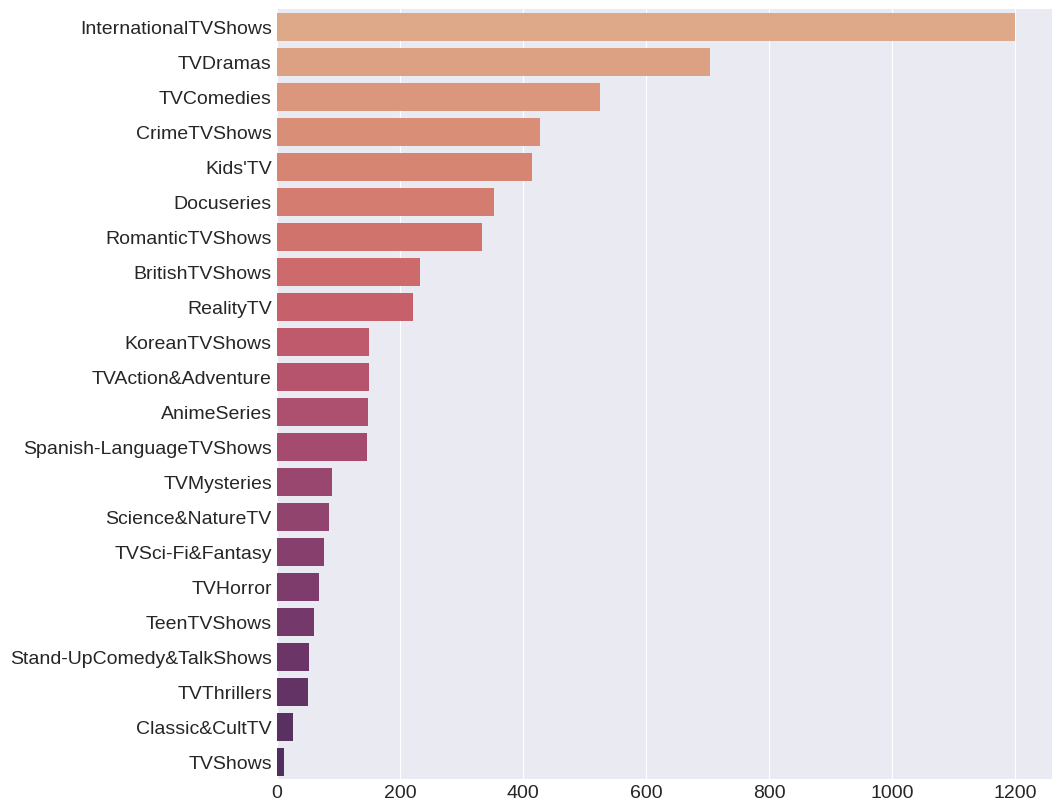

In [145]:
geners_sort = sorted(g.items(), key = lambda item : g[item[0]], reverse = True)
names = [name for name, value in geners_sort]
values = [value for name, value in geners_sort]

plt.figure(figsize = (10,10))
ax = sns.barplot(x = values, y = names, palette = 'flare')
plt.show()

Топовые жанры - это мировое сериалы, драмы, комедии, как и в фильмах

## Топ 10 популярных актеров в сериалах

In [146]:
netflix_shows['cast'].fillna('Unknown', inplace = True)

In [147]:
actors_shows = {}                                # словарь актеров
count_ = list(netflix_shows['cast'])             # подсчитываем количество актеров и групп актеров
for i in count_:                                 # цикл по ним
    i = i.replace(' ', '')                       # удалаяем пробелы, чтобы названия актеров шли слитно
    i = list(i.split(','))                       # и разбиваем их через запятую

    for j in i:                                  # проходимся по списку актеров в группе
        if j in list(actors_shows.keys()):       # и если данный актер есть в словаре актеров,
          actors_shows[j] += 1                   # то прибавляем его в счетчик фильмов
        else:                                    # иначе, если такого актера еще нет в словаре
          actors_shows[j] = 1                    # инициализируем счетчик фильмов с значением 1 для нового актера

In [148]:
actors_sort = sorted(actors_shows.items(), key = lambda item : actors_shows[item[0]], reverse = True)

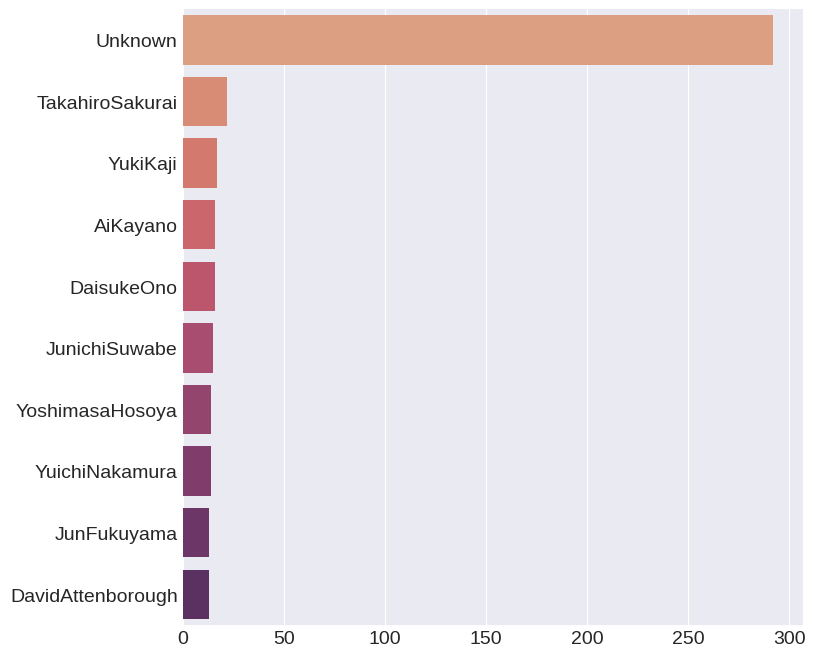

In [149]:
actors_sort = actors_sort[:10]
names = [name for name, value in actors_sort]
values = [value for name, value in actors_sort]

plt.figure(figsize = (8,8))
ax = sns.barplot(x = values, y = names, palette = 'flare')
plt.show()

Takahiro Sakurai, Yuki Kaji, Ai Kayano самые популярные актеры в сериалах

## Топ 10 популярных режиссеров в сериалах

Неизвестных режиссеров в сериалах слишком много, поэтому мы из удалим т.к. они все равно не учитываются в топе

In [150]:
netflix_shows = netflix_shows[['director']].dropna()
netflix_shows.isna().sum()

director    0
dtype: int64

In [151]:
directors_shows = {}                                
count_ = list(netflix_shows['director'])             
for i in count_:                                  
    i = i.replace(' ', '')                        
    i = list(i.split(','))                        

    for j in i:                                   
        if j in list(directors_shows.keys()):      
          directors_shows[j] += 1                  
        else:                                    
          directors_shows[j] = 1 

In [152]:
directors_sort = sorted(directors_shows.items(), key = lambda item : directors_shows[item[0]], reverse = True)

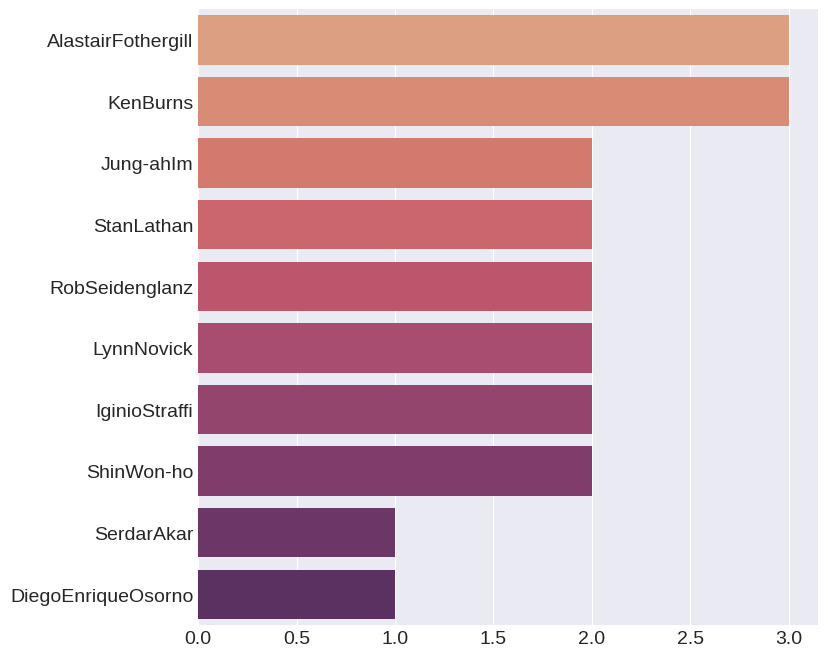

In [153]:
directors_sort = directors_sort[:10]
names = [name for name, value in directors_sort]
values = [value for name, value in directors_sort]

plt.figure(figsize = (8,8))
ax = sns.barplot(x = values, y = names, palette = 'flare')
plt.show()

Как видно из гистограммы, режиссеры мало успевают снять сериалов и максимум это 3 сериала 

# Система рекомендаций (content base)

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [155]:
netflix_movies['description'] = netflix_movies['description'].fillna('')
netflix_movies['description'].isna().sum()

0

## Обучение TfidfVectorizer

In [156]:
tfidf = TfidfVectorizer(stop_words = 'english') # стоп слова английские (предлоги, местоимения, артикли и т.д.)
tfidf_matrix = tfidf.fit_transform(netflix_movies['description'])
tfidf_matrix.shape

(5377, 14601)

14601 слов описывают 5377 фильмов

## Косинусная похожесть

In [157]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [158]:
indices = pd.Series(netflix_movies.index, index = netflix_movies['title']).drop_duplicates()

cosine_sim_df = pd.DataFrame(cosine_sim)
cosine_sim_df.columns = indices.index

cosine_sim_df['title'] = indices.index
cosine_sim_df = cosine_sim_df.set_index('title')

cosine_sim_df.head()

title,7:19,23:59,9,21,122,187,706,1920,1922,"2,215",...,Zoé: Panoramas,Zodiac,Zokkomon,Zombieland,Zoo,Zoom,Zozo,Zubaan,Zulu Man in Japan,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
title,,,,,,,,,,,,,,,,,,,,,
7:19,1.0,0.0,0.000000,0.000000,0.0,0.027618,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.016381,0.0,0.000000,0.093052,0.0
23:59,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.042022,0.000000,0.0,0.000000,0.000000,0.0
9,0.0,0.0,1.000000,0.029333,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.023371,0.000000,0.000000,0.0,0.075939,0.000000,0.0
21,0.0,0.0,0.029333,1.000000,0.0,0.037268,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
122,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.041665,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0


## Рекомендации, основанные на сюжете

In [159]:
def get_recommendations(title, cosine_sim = cosine_sim_df):
    idx = indices[title]
    # получаем похожести для этого фильма
    sim_scores = list(enumerate(cosine_sim_df.loc[title]))

    # сортируем фильмы на основе похожести
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True)
    sim_scores = sim_scores[1:11]

    # получаем индексы фильма
    movie_indices = [i[0] for i in sim_scores]

    return netflix_movies['title'].iloc[movie_indices]

In [160]:
# выведем описание фильма Last Breath
netflix_movies[netflix_movies['title'] == 'Last Breath'].description.iloc[0]

'A commercial diver becomes trapped on the ocean floor with dwindling oxygen and little hope of a timely rescue, so he tries to save himself.'

Описание фильма Last Breath: 
Коммерческий дайвер оказывается в ловушке на дне океана с иссякающим кислородом и малой надеждой на своевременное спасение, поэтому он пытается спастись сам.

In [161]:
get_recommendations('Last Breath')

2972                                          In The Deep
4111                                               Mine 9
1325                                       Chicken Little
4537                               NOVA: Thai Cave Rescue
4332    My Little Pony Equestria Girls: Legend of Ever...
905                                           Big Miracle
4916                                              Posesif
5411                                        Savage Raghda
1846                              Dragon Quest Your Story
5289                                        Rowdy Rathore
Name: title, dtype: object

Видим, что самый похожий фильм In The Deep, выведим его описание

In [162]:
netflix_movies[netflix_movies['title'] == 'In The Deep'].description.iloc[0]

'With little oxygen left in their scuba tanks, two sisters are trapped in a shark cage at the bottom of the ocean while great whites circle nearby.'

Описание фильма In The Deep:
С малым количеством кислорода в своих баллонах для подводного плавания, две сестры застряли в клетке для акул на дне океана, в то время как белые акулы кружат поблизости.

Как можно заметить, фильмы и правда очень похожи по описанию